Dataset shape: (403, 15)
Features shape: (403, 11)
Target shape: (403,)
Training set shape: (322, 11)
Test set shape: (81, 11)
Mean Absolute Error: 0.10172226431019393


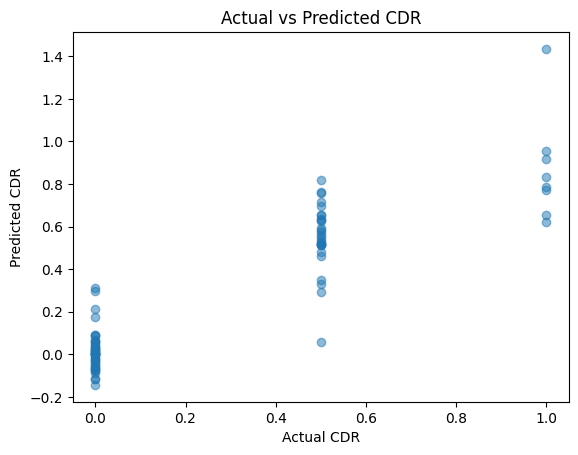

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

dataset = pd.read_csv('../Data/augmented_dementia_dataset.csv')

print(f"Dataset shape: {dataset.shape}")

features = ['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']
target = 'CDR'

categorical_features = ['M/F', 'Group']
numerical_features = features

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

X = dataset[numerical_features + categorical_features]
y = dataset[target]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual CDR")
plt.ylabel("Predicted CDR")
plt.title("Actual vs Predicted CDR")
plt.show()
